In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathondataset/rock_samples_test.csv
/kaggle/input/hackathondataset/rocks_samples_train.csv


In [144]:
import pandas as pd
import numpy as np

In [145]:
data = pd.read_csv('../input/hackathondataset/rocks_samples_train.csv')

In [146]:
data.head()

,Unnamed: 0,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,31305,Marble,Others,-1.139434,D,1.391250e+27,56.0,2.092845,0.932718,1.015231,Class1
1,2629,2629,Basalt,Artificial,-0.150823,C,8.460199e+25,59.0,2.477902,0.002826,1.305626,Class3
2,28602,28602,Granite,Igneous,-1.203973,C,7.635341e+26,58.0,2.080865,-0.874697,0.978326,Class1
3,28668,28668,Granite,Others,-0.941609,C,2.080873e+26,57.0,2.179449,0.993989,1.061257,Class1
4,1788,1788,Basalt,Others,-0.274437,C,4.631068e+26,55.0,2.412468,0.139784,1.280934,Class3


In [147]:
data = data.drop('Unnamed: 0', axis=1)

In [148]:
data.head()

,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,Marble,Others,-1.139434,D,1.391250e+27,56.0,2.092845,0.932718,1.015231,Class1
1,2629,Basalt,Artificial,-0.150823,C,8.460199e+25,59.0,2.477902,0.002826,1.305626,Class3
2,28602,Granite,Igneous,-1.203973,C,7.635341e+26,58.0,2.080865,-0.874697,0.978326,Class1
3,28668,Granite,Others,-0.941609,C,2.080873e+26,57.0,2.179449,0.993989,1.061257,Class1
4,1788,Basalt,Others,-0.274437,C,4.631068e+26,55.0,2.412468,0.139784,1.280934,Class3


In [149]:
data['class'].unique()

array(['Class1', 'Class3', 'Class2', 'Class4', nan, 'Class5', 'Class7',
       'Class6'], dtype=object)

In [150]:
data.shape

(40000, 11)

In [151]:
data.isnull().sum()

sid            0
name           0
type        1972
density     2049
quality        0
porosity    2095
strength    1981
length         0
width          0
depth          0
class       2014
dtype: int64

In [152]:
data1 = data
data1 = data1[data1['class'].notna()]
data1.shape


(37986, 11)

In [153]:
data1.isnull().sum()

sid            0
name           0
type        1881
density     1944
quality        0
porosity    1985
strength    1860
length         0
width          0
depth          0
class          0
dtype: int64

In [154]:
data1['name'].unique()

array(['Marble', 'Basalt', 'Granite', 'Sandstone', 'Limestone', 'Trap',
       'Slate'], dtype=object)

In [155]:
data1['type'].unique()

array(['Others', 'Artificial', 'Igneous', nan, 'Metamorphic',
       'Sedimentary'], dtype=object)

In [156]:
data1['quality'].unique()

array(['D', 'C', 'F', 'E', 'G', 'B', 'A', 'H'], dtype=object)

In [157]:
data1 = data1[data1['type'].notna()]

In [158]:
data1.isnull().sum()

sid            0
name           0
type           0
density     1844
quality        0
porosity    1876
strength    1776
length         0
width          0
depth          0
class          0
dtype: int64

In [159]:
data1.shape

(36105, 11)

In [160]:
data1['class'].value_counts()

Class2    10553
Class1     9729
Class4     6341
Class3     5973
Class5     2040
Class7     1142
Class6      327
Name: class, dtype: int64

In [161]:
data2 = data1
data2.isnull().sum()

sid            0
name           0
type           0
density     1844
quality        0
porosity    1876
strength    1776
length         0
width          0
depth          0
class          0
dtype: int64

In [162]:
a = float((data2['strength'].mean()))
data2['strength'].fillna(a,inplace=True)

In [163]:
data2.isnull().sum()

sid            0
name           0
type           0
density     1844
quality        0
porosity    1876
strength       0
length         0
width          0
depth          0
class          0
dtype: int64

In [164]:
b = float(data2['porosity'].mean())
data2['porosity'].fillna(b,inplace=True)

In [165]:
c = float(data2['density'].mean())
data2['density'].fillna(c,inplace=True)

In [166]:
data2.head()

,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,Marble,Others,-1.139434,D,1.391250e+27,56.0,2.092845,0.932718,1.015231,Class1
1,2629,Basalt,Artificial,-0.150823,C,8.460199e+25,59.0,2.477902,0.002826,1.305626,Class3
2,28602,Granite,Igneous,-1.203973,C,7.635341e+26,58.0,2.080865,-0.874697,0.978326,Class1
3,28668,Granite,Others,-0.941609,C,2.080873e+26,57.0,2.179449,0.993989,1.061257,Class1
4,1788,Basalt,Others,-0.274437,C,4.631068e+26,55.0,2.412468,0.139784,1.280934,Class3


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

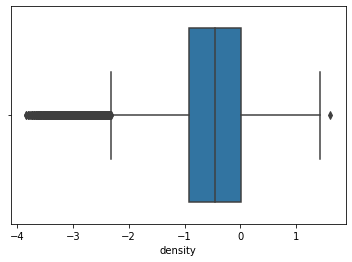

In [168]:
sns.boxplot(data2['density'])

In [169]:
from numpy import percentile
Q1 = data2['density'].quantile(0.25)
Q2 = data2['density'].quantile(0.75)
iqr = Q2-Q1
lower_band = Q1 - 1.5*iqr
upper_band = Q2 + 1.5*iqr
data2['density'] = data2['density'].clip(lower = lower_band, upper = upper_band)

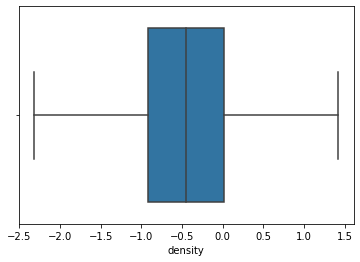

In [170]:
sns.boxplot(data2['density'])

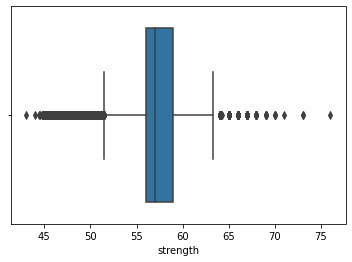

In [171]:
sns.boxplot(data2['strength'])

In [172]:
from numpy import percentile
Q3 = data2['strength'].quantile(0.25)
Q4 = data2['strength'].quantile(0.75)
iqr1 = Q3-Q4
lower_band1 = Q3 - 1.5*iqr1
upper_band1 = Q4 + 1.5*iqr1
data2['strength'] = data2['strength'].clip(lower = lower_band1, upper = upper_band1)

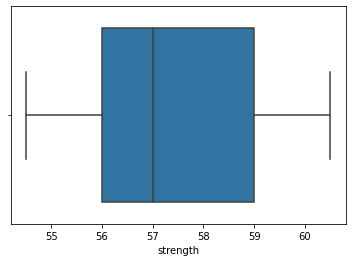

In [173]:
sns.boxplot(data2['strength'])

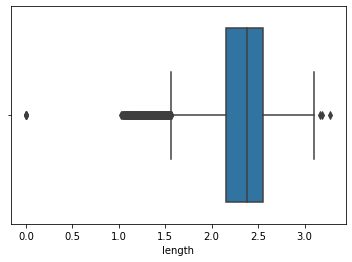

In [174]:
sns.boxplot(data2['length'])

In [175]:
from numpy import percentile
Q3 = data2['length'].quantile(0.25)
Q4 = data2['length'].quantile(0.75)
iqr1 = Q3-Q4
lower_band1 = Q3 - 1.5*iqr1
upper_band1 = Q4 + 1.5*iqr1
data2['length'] = data2['length'].clip(lower = lower_band1, upper = upper_band1)

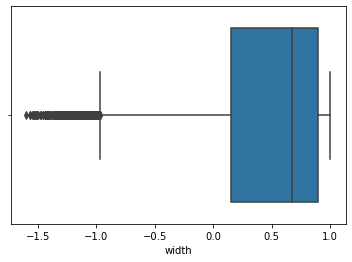

In [176]:
sns.boxplot(data2['width'])

In [177]:
from numpy import percentile
Q3 = data2['width'].quantile(0.25)
Q4 = data2['width'].quantile(0.75)
iqr1 = Q3-Q4
lower_band1 = Q3 - 1.5*iqr1
upper_band1 = Q4 + 1.5*iqr1
data2['width'] = data2['width'].clip(lower = lower_band1, upper = upper_band1)

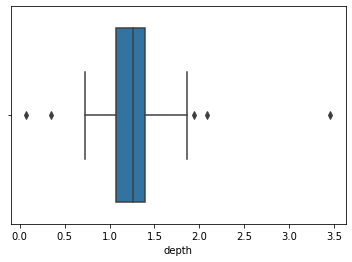

In [178]:
sns.boxplot(data2['depth'])

In [179]:
from numpy import percentile
Q3 = data2['depth'].quantile(0.25)
Q4 = data2['depth'].quantile(0.75)
iqr1 = Q3-Q4
lower_band1 = Q3 - 1.5*iqr1
upper_band1 = Q4 + 1.5*iqr1
data2['depth'] = data2['depth'].clip(lower = lower_band1, upper = upper_band1)

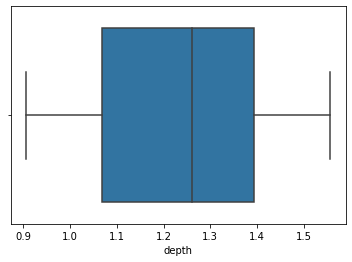

In [180]:
sns.boxplot(data2['depth'])

In [181]:
data2.head(30)

,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,Marble,Others,-1.139434,D,1.391250e+27,56.000000,2.092845,0.932718,1.015231,Class1
1,2629,Basalt,Artificial,-0.150823,C,8.460199e+25,59.000000,2.477902,0.002826,1.305626,Class3
2,28602,Granite,Igneous,-1.203973,C,7.635341e+26,58.000000,2.080865,-0.224175,0.978326,Class1
3,28668,Granite,Others,-0.941609,C,2.080873e+26,57.000000,2.179449,0.993989,1.061257,Class1
4,1788,Basalt,Others,-0.274437,C,4.631068e+26,55.000000,2.412468,0.139784,1.280934,Class3
5,37453,Granite,Others,-1.049822,D,1.030663e+27,56.000000,2.128380,0.959595,1.033184,Class1
7,194,Granite,Igneous,-0.356675,C,1.142007e+26,59.000000,2.406242,0.258348,1.241269,Class2
8,20385,Sandstone,Igneous,-1.171183,D,1.139059e+27,60.000000,2.078461,0.874323,0.993252,Class1
9,39017,Marble,Others,-0.843970,D,1.468230e+30,56.000000,2.193171,0.986231,1.091923,Class2
10,32824,Marble,Others,-1.078810,D,8.438357e+26,55.000000,2.109502,0.951353,1.018847,Class1


In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['strength']
data3 = pd.DataFrame(data = data2)
data3[numerical] = scaler.fit_transform(data2[numerical])

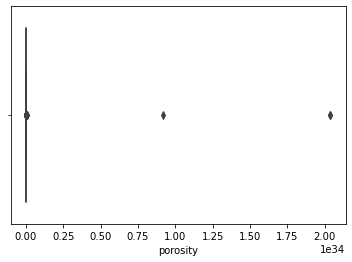

In [183]:
sns.boxplot(data3['porosity'])

In [184]:
skewed = ['porosity']
data4 = pd.DataFrame(data = data3)
data4[skewed] = data3[skewed].apply(lambda x: np.log(x + 1))

In [185]:
data4.head()

,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,Marble,Others,-1.139434,D,62.5,0.250000,2.092845,0.932718,1.015231,Class1
1,2629,Basalt,Artificial,-0.150823,C,59.7,0.750000,2.477902,0.002826,1.305626,Class3
2,28602,Granite,Igneous,-1.203973,C,61.9,0.583333,2.080865,-0.224175,0.978326,Class1
3,28668,Granite,Others,-0.941609,C,60.6,0.416667,2.179449,0.993989,1.061257,Class1
4,1788,Basalt,Others,-0.274437,C,61.4,0.083333,2.412468,0.139784,1.280934,Class3


In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['porosity']
data5 = pd.DataFrame(data = data4)
data5[numerical] = scaler.fit_transform(data4[numerical])

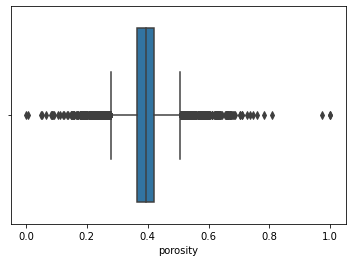

In [187]:
sns.boxplot(data5['porosity'])

In [188]:
#apply Outlier correction for porosity

In [189]:
data5.head(10)

,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,Marble,Others,-1.139434,D,0.414894,0.250000,2.092845,0.932718,1.015231,Class1
1,2629,Basalt,Artificial,-0.150823,C,0.315603,0.750000,2.477902,0.002826,1.305626,Class3
2,28602,Granite,Igneous,-1.203973,C,0.393617,0.583333,2.080865,-0.224175,0.978326,Class1
3,28668,Granite,Others,-0.941609,C,0.347518,0.416667,2.179449,0.993989,1.061257,Class1
4,1788,Basalt,Others,-0.274437,C,0.375887,0.083333,2.412468,0.139784,1.280934,Class3
5,37453,Granite,Others,-1.049822,D,0.404255,0.250000,2.128380,0.959595,1.033184,Class1
7,194,Granite,Igneous,-0.356675,C,0.326241,0.750000,2.406242,0.258348,1.241269,Class2
8,20385,Sandstone,Igneous,-1.171183,D,0.407801,0.916667,2.078461,0.874323,0.993252,Class1
9,39017,Marble,Others,-0.843970,D,0.661759,0.250000,2.193171,0.986231,1.091923,Class2
10,32824,Marble,Others,-1.078810,D,0.397163,0.083333,2.109502,0.951353,1.018847,Class1


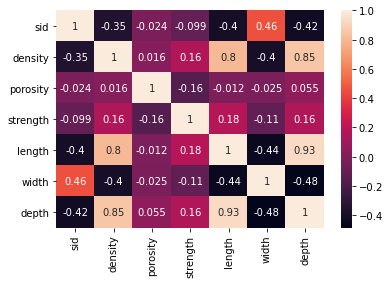

In [190]:
sns.heatmap(data5.corr(),annot=True)

In [191]:
data5['class'] = data5['class'].map({'Class1': 1, 'Class2': 2,'Class3': 3,'Class4': 4,'Class5': 5,'Class6': 6,'Class7': 7})

In [192]:
data5.head()

,sid,name,type,density,quality,porosity,strength,length,width,depth,class
0,31305,Marble,Others,-1.139434,D,0.414894,0.250000,2.092845,0.932718,1.015231,1
1,2629,Basalt,Artificial,-0.150823,C,0.315603,0.750000,2.477902,0.002826,1.305626,3
2,28602,Granite,Igneous,-1.203973,C,0.393617,0.583333,2.080865,-0.224175,0.978326,1
3,28668,Granite,Others,-0.941609,C,0.347518,0.416667,2.179449,0.993989,1.061257,1
4,1788,Basalt,Others,-0.274437,C,0.375887,0.083333,2.412468,0.139784,1.280934,3


In [193]:
data6 = pd.get_dummies(data5)

In [194]:
data6.head()

,sid,density,porosity,strength,length,width,depth,class,name_Basalt,name_Granite,...,type_Others,type_Sedimentary,quality_A,quality_B,quality_C,quality_D,quality_E,quality_F,quality_G,quality_H
0,31305,-1.139434,0.414894,0.250000,2.092845,0.932718,1.015231,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2629,-0.150823,0.315603,0.750000,2.477902,0.002826,1.305626,3,1,0,...,0,0,0,0,1,0,0,0,0,0
2,28602,-1.203973,0.393617,0.583333,2.080865,-0.224175,0.978326,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,28668,-0.941609,0.347518,0.416667,2.179449,0.993989,1.061257,1,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1788,-0.274437,0.375887,0.083333,2.412468,0.139784,1.280934,3,1,0,...,1,0,0,0,1,0,0,0,0,0


In [195]:
data6.columns

Index(['sid', 'density', 'porosity', 'strength', 'length', 'width', 'depth',
       'class', 'name_Basalt', 'name_Granite', 'name_Limestone', 'name_Marble',
       'name_Sandstone', 'name_Slate', 'name_Trap', 'type_Artificial',
       'type_Igneous', 'type_Metamorphic', 'type_Others', 'type_Sedimentary',
       'quality_A', 'quality_B', 'quality_C', 'quality_D', 'quality_E',
       'quality_F', 'quality_G', 'quality_H'],
      dtype='object')

In [196]:
data6.to_csv('preprocessed_data.csv')

In [197]:
X = data6.loc[:,data6.columns != 'class']
y = data6['class']

In [198]:
X1 = X.drop('sid',axis=1)

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=42)

In [200]:
X_train.columns

Index(['density', 'porosity', 'strength', 'length', 'width', 'depth',
       'name_Basalt', 'name_Granite', 'name_Limestone', 'name_Marble',
       'name_Sandstone', 'name_Slate', 'name_Trap', 'type_Artificial',
       'type_Igneous', 'type_Metamorphic', 'type_Others', 'type_Sedimentary',
       'quality_A', 'quality_B', 'quality_C', 'quality_D', 'quality_E',
       'quality_F', 'quality_G', 'quality_H'],
      dtype='object')

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [202]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [203]:
y_pred = model.predict(X_test)

In [204]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [205]:
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))

The accuracy score of RandomForestClassifier model is 0.8864475627769571


In [206]:
test = pd.read_csv('../input/hackathondataset/rock_samples_test.csv')

In [207]:
test.head()

,Unnamed: 0,sid,name,type,density,quality,porosity,strength,length,width,depth
0,2,2,Granite,Igneous,-1.560648,C,9.349966e+25,61.0,1.972308,0.413447,0.837248
1,4,4,Limestone,Igneous,-1.237874,D,1.258855e+27,58.0,2.049390,0.784800,0.966984
2,6,6,Slate,Artificial,-1.427116,F,1.877991e+27,57.0,1.984943,0.532985,0.908259
3,7,7,Limestone,Artificial,-1.427116,G,NaN,57.0,1.756217,0.552910,0.904218
4,8,8,Basalt,Artificial,-1.347074,C,7.635341e+26,55.0,2.017424,0.678950,0.928219


In [208]:
test = test.drop('Unnamed: 0',axis=1)

In [209]:
test.isnull().sum()

sid           0
name          0
type        717
density     699
quality       0
porosity    690
strength    753
length        0
width         0
depth         0
dtype: int64

In [210]:
test1 = test[test['type'].notna()]

In [211]:
test1.isnull().sum()

sid           0
name          0
type          0
density     661
quality       0
porosity    657
strength    723
length        0
width         0
depth         0
dtype: int64

In [212]:
a = float((test1['strength'].mean()))
test1['strength'].fillna(a,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [213]:
b = float((test1['porosity'].mean()))
test1['porosity'].fillna(b,inplace=True)

c = float((test1['density'].mean()))
test1['density'].fillna(c,inplace=True)

In [214]:
test1.isnull().sum()

sid         0
name        0
type        0
density     0
quality     0
porosity    0
strength    0
length      0
width       0
depth       0
dtype: int64

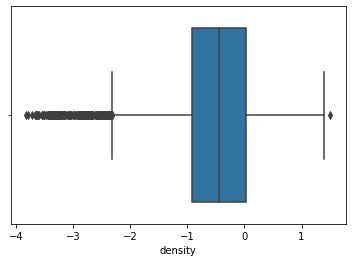

In [215]:
sns.boxplot(test1['density'])

In [216]:
from numpy import percentile
Q1 = test1['density'].quantile(0.25)
Q2 = test1['density'].quantile(0.75)
iqr = Q2-Q1
lower_band = Q1 - 1.5*iqr
upper_band = Q2 + 1.5*iqr
test1['density'] = test1['density'].clip(lower = lower_band, upper = upper_band)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


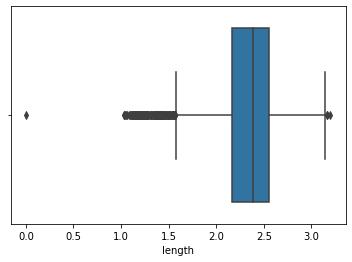

In [217]:
sns.boxplot(test['length'])

In [218]:
Q1 = test1['strength'].quantile(0.25)
Q2 = test1['strength'].quantile(0.75)
iqr = Q2-Q1
lower_band = Q1 - 1.5*iqr
upper_band = Q2 + 1.5*iqr
test1['strength'] = test1['strength'].clip(lower = lower_band, upper = upper_band)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [219]:
Q1 = test1['length'].quantile(0.25)
Q2 = test1['length'].quantile(0.75)
iqr = Q2-Q1
lower_band = Q1 - 1.5*iqr
upper_band = Q2 + 1.5*iqr
test1['length'] = test1['length'].clip(lower = lower_band, upper = upper_band)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


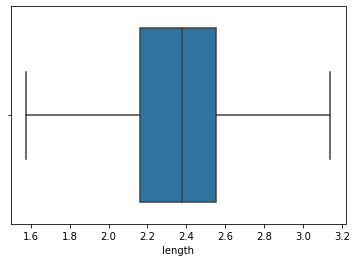

In [220]:
sns.boxplot(test1['length'])

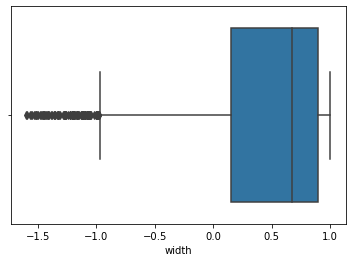

In [221]:
sns.boxplot(test1['width'])

In [222]:
Q1 = test1['width'].quantile(0.25)
Q2 = test1['width'].quantile(0.75)
iqr = Q2-Q1
lower_band = Q1 - 1.5*iqr
upper_band = Q2 + 1.5*iqr
test1['width'] = test1['width'].clip(lower = lower_band, upper = upper_band)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


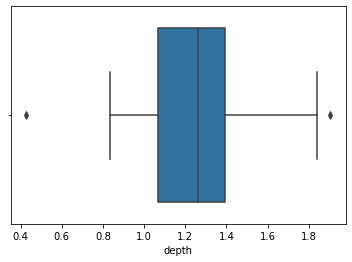

In [223]:
sns.boxplot(test1['depth'])

In [224]:
Q1 = test1['depth'].quantile(0.25)
Q2 = test1['depth'].quantile(0.75)
iqr = Q2-Q1
lower_band = Q1 - 1.5*iqr
upper_band = Q2 + 1.5*iqr
test1['depth'] = test1['depth'].clip(lower = lower_band, upper = upper_band)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


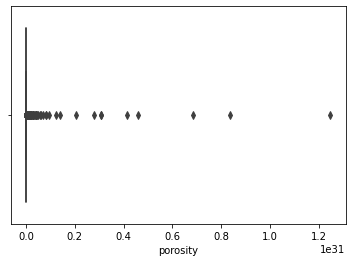

In [231]:
sns.boxplot(test1['porosity'])

In [232]:
skewed = ['porosity']
test2 = pd.DataFrame(data = test1)
test2[skewed] = test2[skewed].apply(lambda x: np.log(x + 1))

In [233]:
test2.head()

,sid,name,type,density,quality,porosity,strength,length,width,depth
0,2,Granite,Igneous,-1.560648,C,59.800000,61.0,1.972308,0.413447,0.837248
1,4,Limestone,Igneous,-1.237874,D,62.400000,58.0,2.049390,0.784800,0.966984
2,6,Slate,Artificial,-1.427116,F,62.800000,57.0,1.984943,0.532985,0.908259
3,7,Limestone,Artificial,-1.427116,G,64.067898,57.0,1.756217,0.552910,0.904218
4,8,Basalt,Artificial,-1.347074,C,61.900000,55.0,2.017424,0.678950,0.928219


In [234]:
scaler = MinMaxScaler()
numerical = ['porosity','strength']
test3 = pd.DataFrame(data = test2)
test3[numerical] = scaler.fit_transform(test2[numerical])

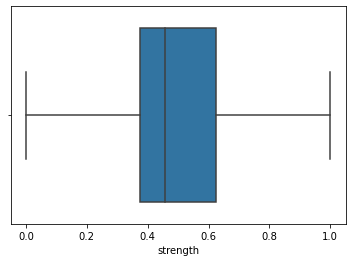

In [238]:
sns.boxplot(test3['strength'])

In [239]:
test4 = pd.get_dummies(test3)

In [240]:
test4.head()

,sid,density,porosity,strength,length,width,depth,name_Basalt,name_Granite,name_Limestone,...,type_Others,type_Sedimentary,quality_A,quality_B,quality_C,quality_D,quality_E,quality_F,quality_G,quality_H
0,2,-1.560648,0.587413,0.791667,1.972308,0.413447,0.837248,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,4,-1.237874,0.678322,0.541667,2.049390,0.784800,0.966984,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,6,-1.427116,0.692308,0.458333,1.984943,0.532985,0.908259,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7,-1.427116,0.736640,0.458333,1.756217,0.552910,0.904218,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,8,-1.347074,0.660839,0.291667,2.017424,0.678950,0.928219,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [241]:
test4.shape

(13223, 27)

In [242]:
test4.to_csv('Test4_preprocessed.csv')

In [249]:
sid = test4[['sid']]

In [251]:
test4 = test4.drop('sid',axis=1)

In [253]:
test4.head()

,density,porosity,strength,length,width,depth,name_Basalt,name_Granite,name_Limestone,name_Marble,...,type_Others,type_Sedimentary,quality_A,quality_B,quality_C,quality_D,quality_E,quality_F,quality_G,quality_H
0,-1.560648,0.587413,0.791667,1.972308,0.413447,0.837248,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.237874,0.678322,0.541667,2.049390,0.784800,0.966984,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.427116,0.692308,0.458333,1.984943,0.532985,0.908259,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.427116,0.736640,0.458333,1.756217,0.552910,0.904218,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.347074,0.660839,0.291667,2.017424,0.678950,0.928219,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [265]:
X_test.head()

,density,porosity,strength,length,width,depth,name_Basalt,name_Granite,name_Limestone,name_Marble,...,type_Others,type_Sedimentary,quality_A,quality_B,quality_C,quality_D,quality_E,quality_F,quality_G,quality_H
36139,-0.693147,0.365248,0.916667,2.262742,0.857133,1.137833,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23644,-0.994252,0.379433,0.416667,2.144761,0.993227,1.043804,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
10682,-0.314711,0.319149,1.000000,2.414539,0.176202,1.249902,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31090,0.029559,0.386525,0.250000,2.547548,0.064517,1.391282,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6523,0.760806,0.372340,1.000000,2.751951,0.829226,1.556573,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [274]:
y_pred = model.predict(X_test)

In [275]:
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))

The accuracy score of RandomForestClassifier model is 0.8864475627769571


In [290]:
y_pred = model.predict(test4)

In [291]:
y_pred

array([1, 1, 1, ..., 2, 2, 2])

In [292]:
final = pd.DataFrame(y_pred)

In [293]:
final

,0
0,1
1,1
2,1
3,1
4,1
...,...
13218,2
13219,2
13220,2
13221,2


In [295]:
final['Sid'] = sid

In [298]:
final1 = final[['Sid']]

In [303]:
final1['Predicted_class'] = final[['Predicted_class']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [324]:
sid = test3[['sid']]

In [325]:
final2 = pd.DataFrame(sid)

In [337]:
final2['predicted_class'] = final4[['Predicted_class']]

In [338]:
final2.head(50)

,sid,Predicted_class,predicted_class
0,2,Class1,Class1
1,4,Class1,Class1
2,6,Class1,Class1
3,7,Class1,Class1
4,8,Class1,Class1
5,9,Class1,Class1
6,12,Class1,Class1
7,22,Class1,Class1
8,24,Class1,Class1
9,26,Class1,Class1


In [328]:
final3 = final2['Predicted_class'].map({1: 'Class1', 2: 'Class2',3: 'Class3',4: 'Class4',5: 'Class5',6: 'Class6',7: 'Class7'})

In [331]:
final4 = pd.DataFrame(final3)

In [332]:
final4.head(50)

,Predicted_class
0,Class1
1,Class1
2,Class1
3,Class1
4,Class1
5,Class1
6,Class1
7,Class1
8,Class1
9,Class1


In [335]:
final2.shape

(13223, 2)

In [336]:
final2.head()

,sid,Predicted_class
0,2,Class1
1,4,Class1
2,6,Class1
3,7,Class1
4,8,Class1


In [339]:
final2 = final2.drop('Predicted_class',axis=1)

In [340]:
final2.head(50)

,sid,predicted_class
0,2,Class1
1,4,Class1
2,6,Class1
3,7,Class1
4,8,Class1
5,9,Class1
6,12,Class1
7,22,Class1
8,24,Class1
9,26,Class1


In [341]:
final2.to_csv('Aditya_Kumar.csv')